<a href="https://colab.research.google.com/github/AndreAilton/AndreAilton/blob/main/Analise_Dados_Enem_Serrana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import datetime as dt
pd.set_option('display.max_columns', None)


In [ ]:
colors=['#1C4E80','#A5D8DD','#0091D5','#EA6A47','black']
Color=['blue','red']
legendas=['<400','>=400 E <500','>=500 E <600','>=600 E <700','>=800']
Etnia=['Não informado','Branca','Parda','Preta','Amarela','Indigena']
Questionario = ['Q001', 'Q002', 'Q003','Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012','Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021','Q022', 'Q023', 'Q024', 'Q025']
contM=0
contF=0

In [ ]:
Tabela2018 = pd.read_excel('/content/drive/MyDrive/Bases/Enem/Amostra Serrana2018.xlsx')
Tabela2019 = pd.read_excel('/content/drive/MyDrive/Bases/Enem/Amostra Serrana2019.xlsx')
Tabela2020 = pd.read_excel('/content/drive/MyDrive/Bases/Enem/Amostra Serrana2020.xlsx')
Tabela2021 = pd.read_excel('/content/drive/MyDrive/Bases/Enem/Amostra Serrana2021.xlsx')

In [ ]:
Tabela2018[
  (Tabela2018['TP_PRESENCA_CH'] == 1)
 & (Tabela2018['TP_PRESENCA_CN'] == 1) 
 & (Tabela2018['TP_PRESENCA_LC'] == 1) 
 & (Tabela2018['TP_PRESENCA_MT'] == 1)
 ].shape[0]
 #685 Pessoas fizeram Enem em 2018

685

In [ ]:
Tabela2019[
  (Tabela2019['TP_PRESENCA_CH'] == 1)
 & (Tabela2019['TP_PRESENCA_CN'] == 1) 
 & (Tabela2019['TP_PRESENCA_LC'] == 1) 
 & (Tabela2019['TP_PRESENCA_MT'] == 1)
 ].shape[0]

#667 Pessoas fizeram Enem em 2019

667

In [ ]:
Tabela2020[
  (Tabela2020['TP_PRESENCA_CH'] == 1)
 & (Tabela2020['TP_PRESENCA_CN'] == 1) 
 & (Tabela2020['TP_PRESENCA_LC'] == 1) 
 & (Tabela2020['TP_PRESENCA_MT'] == 1)
 ].shape[0]
# 441 Pessoas Fizeram Enem Em 2020

441

In [ ]:
Tabela2021[
  (Tabela2021['TP_PRESENCA_CH'] == 1) 
& (Tabela2021['TP_PRESENCA_CN'] == 1) 
& (Tabela2021['TP_PRESENCA_LC'] == 1) 
& (Tabela2021['TP_PRESENCA_MT'] == 1)
].shape[0]
# 350 Pessoas Fizeram Enem Em 2021

350

In [ ]:
#Ajuste de pessoas que fizeram
Tabela2018 = Tabela2018[
  (Tabela2018['TP_PRESENCA_CH'] == 1)
 & (Tabela2018['TP_PRESENCA_CN'] == 1) 
 & (Tabela2018['TP_PRESENCA_LC'] == 1) 
 & (Tabela2018['TP_PRESENCA_MT'] == 1)
 ]

In [ ]:
#Ajuste de pessoas que fizeram
Tabela2019 = Tabela2019[
  (Tabela2019['TP_PRESENCA_CH'] == 1)
 & (Tabela2019['TP_PRESENCA_CN'] == 1) 
 & (Tabela2019['TP_PRESENCA_LC'] == 1) 
 & (Tabela2019['TP_PRESENCA_MT'] == 1)
 ]

In [ ]:
#Ajuste de pessoas que fizeram
Tabela2020 = Tabela2020[
  (Tabela2020['TP_PRESENCA_CH'] == 1)
 & (Tabela2020['TP_PRESENCA_CN'] == 1) 
 & (Tabela2020['TP_PRESENCA_LC'] == 1) 
 & (Tabela2020['TP_PRESENCA_MT'] == 1)
 ]

In [ ]:
#Ajuste de pessoas que fizeram
Tabela2021 = Tabela2021[
  (Tabela2021['TP_PRESENCA_CH'] == 1) 
& (Tabela2021['TP_PRESENCA_CN'] == 1) 
& (Tabela2021['TP_PRESENCA_LC'] == 1) 
& (Tabela2021['TP_PRESENCA_MT'] == 1)
]

In [ ]:
#Ajustando a media geral da nota que a pessoa tirou
Tabela2018['Media_nota'] = (Tabela2018['NU_NOTA_CN'] + Tabela2018['NU_NOTA_CH']+Tabela2018['NU_NOTA_LC'] + Tabela2018['NU_NOTA_MT'] + Tabela2018['NU_NOTA_REDACAO'])/5
Tabela2019['Media_nota'] = (Tabela2019['NU_NOTA_CN'] + Tabela2019['NU_NOTA_CH']+Tabela2019['NU_NOTA_LC'] + Tabela2019['NU_NOTA_MT'] + Tabela2019['NU_NOTA_REDACAO'])/5
Tabela2020['Media_nota'] = (Tabela2020['NU_NOTA_CN'] + Tabela2020['NU_NOTA_CH']+Tabela2020['NU_NOTA_LC'] + Tabela2020['NU_NOTA_MT'] + Tabela2020['NU_NOTA_REDACAO'])/5
Tabela2021['Media_nota'] = (Tabela2021['NU_NOTA_CN'] + Tabela2021['NU_NOTA_CH']+Tabela2021['NU_NOTA_LC'] + Tabela2021['NU_NOTA_MT'] + Tabela2021['NU_NOTA_REDACAO'])/5

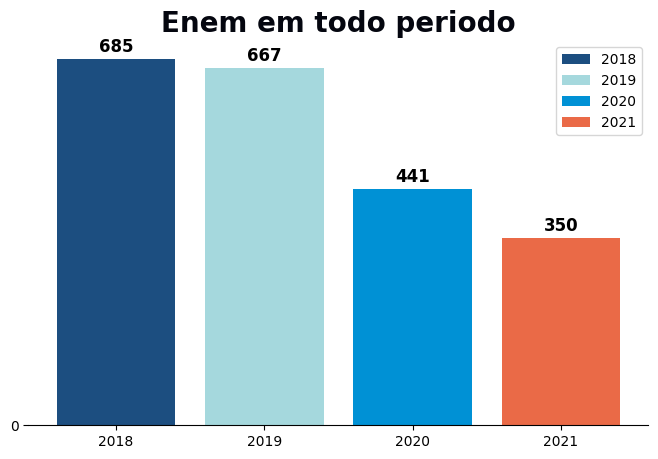

In [ ]:
#Grafico mostrando quantidade de alunos que fizeram enem

fig, ax = plt.subplots(figsize=(8,5))
#====================================
ax.set_title('Enem em todo periodo', fontsize=20,fontweight='bold', color='#04060F')
ax.xaxis.set_ticks([2018,2019,2020,2021])
ax.set_yticks([0,1200])
#====================================
ax.bar(Tabela2018['NU_ANO'].values, Tabela2018.shape[0], label=2018, color='#1C4E80')
ax.bar(Tabela2019['NU_ANO'].values, Tabela2019.shape[0], label=2019, color='#A5D8DD')
ax.bar(Tabela2020['NU_ANO'].values, Tabela2020.shape[0], label=2020, color='#0091D5')
ax.bar(Tabela2021['NU_ANO'].values, Tabela2021.shape[0], label=2021, color='#EA6A47')

#====================================
ax.annotate('{}'.format(Tabela2018.shape[0]), (2018, Tabela2018.shape[0]), fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')

ax.annotate('{}'.format(Tabela2019.shape[0]), (2019, Tabela2019.shape[0]), fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')

ax.annotate('{}'.format(Tabela2020.shape[0]), (2020, Tabela2020.shape[0]), fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')

ax.annotate('{}'.format(Tabela2021.shape[0]), (2021, Tabela2021.shape[0]), fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')

#=================================================
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
#===================================================
ax.legend()
plt.show()

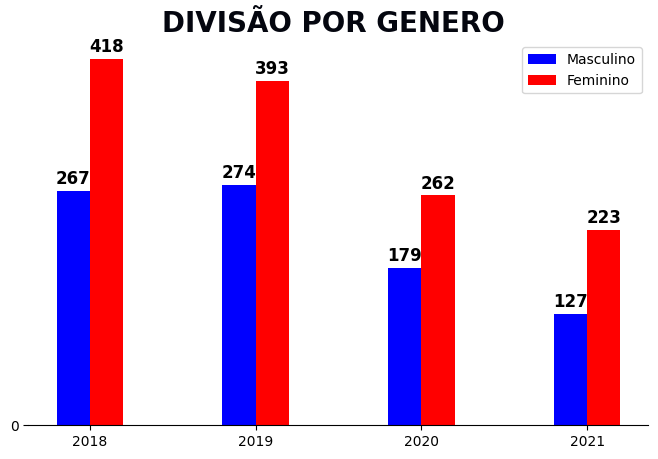

In [ ]:
#Divisão por genero De alunos

fig, ax = plt.subplots(figsize=(8,5))
#====================================
ax.set_title('DIVISÃO POR GENERO ', fontsize=20,fontweight='bold', color='#04060F')
ax.xaxis.set_ticks([2018,2019,2020,2021])
ax.set_yticks([0,1500])
wid=0.2
#====================================
ax.bar(Tabela2018['NU_ANO'].values-wid/2, Tabela2018[Tabela2018['TP_SEXO'] == 'M'].shape[0], color='blue', width=wid)
ax.bar(Tabela2018['NU_ANO'].values+wid/2, Tabela2018[Tabela2018['TP_SEXO'] == 'F'].shape[0], color='r',width=wid)

ax.bar(Tabela2019['NU_ANO'].values-wid/2, Tabela2019[Tabela2019['TP_SEXO'] == 'M'].shape[0], color='blue', width=wid)
ax.bar(Tabela2019['NU_ANO'].values+wid/2, Tabela2019[Tabela2019['TP_SEXO'] == 'F'].shape[0], color='r',width=wid)

ax.bar(Tabela2020['NU_ANO'].values-wid/2, Tabela2020[Tabela2020['TP_SEXO'] == 'M'].shape[0], color='blue', width=wid)
ax.bar(Tabela2020['NU_ANO'].values+wid/2, Tabela2020[Tabela2020['TP_SEXO'] == 'F'].shape[0], color='r',width=wid)

ax.bar(Tabela2021['NU_ANO'].values-wid/2, Tabela2021[Tabela2021['TP_SEXO'] == 'M'].shape[0], label='Masculino', color='blue', width=wid)
ax.bar(Tabela2021['NU_ANO'].values+wid/2, Tabela2021[Tabela2021['TP_SEXO'] == 'F'].shape[0], label='Feminino', color='r',width=wid)

#====================================
ax.annotate('{}'.format(Tabela2018[Tabela2018['TP_SEXO'] == 'F'].shape[0]), (2018+wid/2, Tabela2018[Tabela2018['TP_SEXO'] == 'F'].shape[0]), fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')

ax.annotate('{}'.format(Tabela2019[Tabela2019['TP_SEXO'] == 'F'].shape[0]), (2019+wid/2, Tabela2019[Tabela2019['TP_SEXO'] == 'F'].shape[0]), fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')

ax.annotate('{}'.format(Tabela2020[Tabela2020['TP_SEXO'] == 'F'].shape[0]), (2020+wid/2, Tabela2020[Tabela2020['TP_SEXO'] == 'F'].shape[0]), fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')

ax.annotate('{}'.format(Tabela2021[Tabela2021['TP_SEXO'] == 'F'].shape[0]), (2021+wid/2, Tabela2021[Tabela2021['TP_SEXO'] == 'F'].shape[0]), fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')
#=================================================
ax.annotate('{}'.format(Tabela2018[Tabela2018['TP_SEXO'] == 'M'].shape[0]), (2018-wid/2, Tabela2018[Tabela2018['TP_SEXO'] == 'M'].shape[0]), fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')

ax.annotate('{}'.format(Tabela2019[Tabela2019['TP_SEXO'] == 'M'].shape[0]), (2019-wid/2, Tabela2019[Tabela2019['TP_SEXO'] == 'M'].shape[0]), fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')

ax.annotate('{}'.format(Tabela2020[Tabela2020['TP_SEXO'] == 'M'].shape[0]), (2020-wid/2, Tabela2020[Tabela2020['TP_SEXO'] == 'M'].shape[0]), fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')

ax.annotate('{}'.format(Tabela2021[Tabela2021['TP_SEXO'] == 'M'].shape[0]), (2021-wid/2, Tabela2021[Tabela2021['TP_SEXO'] == 'M'].shape[0]), fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')
#===================================================
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()
plt.show()

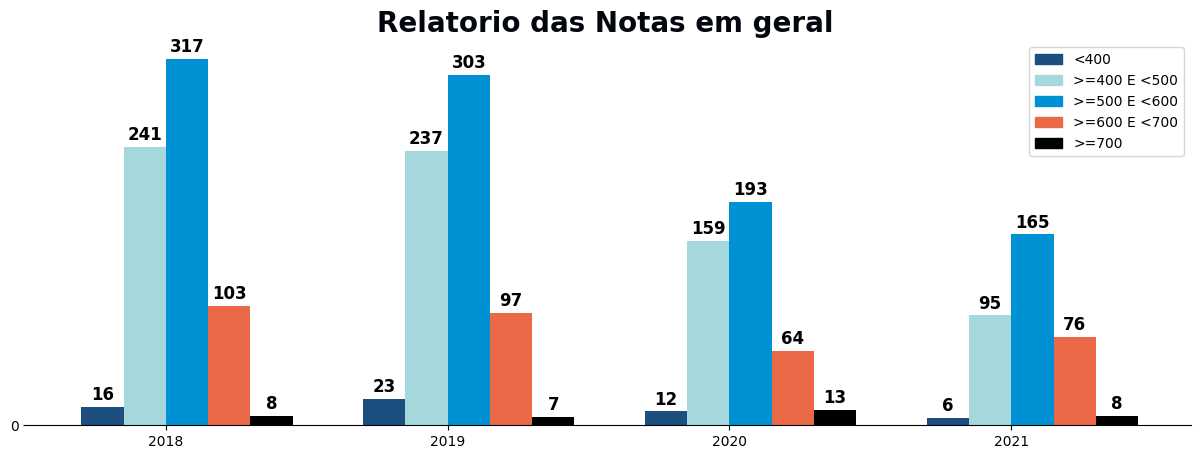

In [ ]:
#Segmentação por notas dos alunos


Tabela1 = pd.merge(Tabela2018,Tabela2019, how = 'outer')
Tabela2= pd.merge(Tabela2020,Tabela2021, how = 'outer')
Tabelax= pd.merge(Tabela1,Tabela2, how = 'outer')
wid= 0.15
fig, ax = plt.subplots(figsize=(15,5))
#=========================================================
ax.set_title('Relatorio das Notas em geral ', fontsize=20,fontweight='bold', color='#04060F')
ax.xaxis.set_ticks([2018,2019,2020,2021])
ax.set_yticks([0,500])
#==========================================================

data1 = [2018,2019,2020,2021]
for c in data1:
  ax.bar(c-wid-wid/2, Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] <400)]['Media_nota'].size, width=wid, color='#1C4E80')
  ax.bar(c-wid/2, Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] >=400) & (Tabelax['Media_nota'] <500)]['Media_nota'].size, width=wid, color='#A5D8DD')
  ax.bar(c+wid/2, Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] >=500) & (Tabelax['Media_nota'] <600)]['Media_nota'].size, width=wid, color='#0091D5')
  ax.bar(c+wid+wid/2, Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] >=600) & (Tabelax['Media_nota'] <700)]['Media_nota'].size, width=wid, color='#EA6A47')
  ax.bar(c+wid+wid+wid/2, Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] >=700) & (Tabelax['Media_nota'] <800)]['Media_nota'].size, width=wid, color='black')
#====================================================
for c in data1:
  ax.annotate('{}'.format( Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] <400)]['Media_nota'].size),(c-wid-wid/2,Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] <400)]['Media_nota'].size),fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')

  ax.annotate('{}'.format(Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] >=400) & (Tabelax['Media_nota'] <500)]['Media_nota'].size),(c-wid/2, Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] >=400) & (Tabelax['Media_nota'] <500)]['Media_nota'].size),fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')
  
  ax.annotate('{}'.format(Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] >=500) & (Tabelax['Media_nota'] <600)]['Media_nota'].size),(c+wid/2, Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] >=500) & (Tabelax['Media_nota'] <600)]['Media_nota'].size),fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')
  
  ax.annotate('{}'.format(Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] >=600) & (Tabelax['Media_nota'] <700)]['Media_nota'].size),(c+wid+wid/2, Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] >=600) & (Tabelax['Media_nota'] <700)]['Media_nota'].size),fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')
 
  ax.annotate('{}'.format(Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] >=700) & (Tabelax['Media_nota'] <800)]['Media_nota'].size),(c+wid+wid+wid/2,Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Media_nota'] >=700) & (Tabelax['Media_nota'] <800)]['Media_nota'].size),fontsize=12, ha='center', 
            xytext=(0,5),textcoords= "offset points", color='black', fontweight='bold')

#===================
L400 = mpatches.Patch(color='#1C4E80', label='<400')
L500 = mpatches.Patch(color='#A5D8DD', label='>=400 E <500')
L600 = mpatches.Patch(color='#0091D5', label='>=500 E <600')
L700 = mpatches.Patch(color='#EA6A47', label='>=600 E <700')
L800 = mpatches.Patch(color='black', label='>=700')
plt.legend(handles=[L400,L500,L600,L700,L800])
#=========================
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

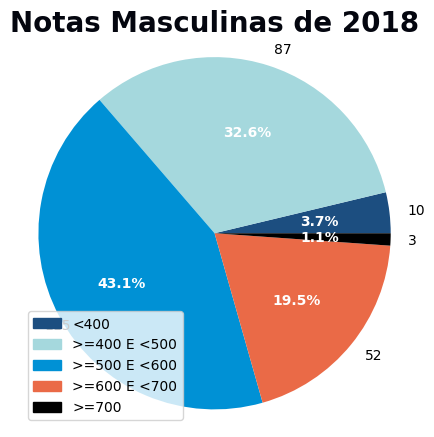

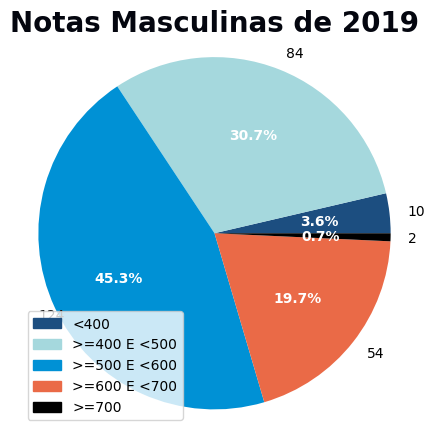

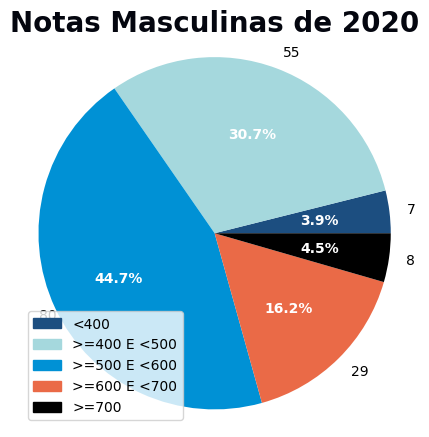

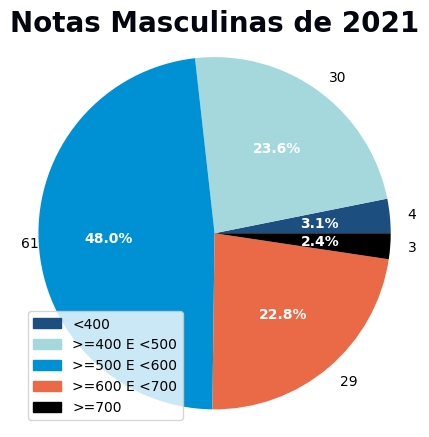

In [ ]:
#Notas segmentadas masculinas

for cx in data1:
  VLM= []
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] <400)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=400) & (Tabelax['Media_nota'] <500)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=500) & (Tabelax['Media_nota'] <600)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=600) & (Tabelax['Media_nota'] <700)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=700) & (Tabelax['Media_nota'] <800)]['Media_nota'].size)
  
  fig, ax = plt.subplots(figsize=(5,15))
  #=======================================================
  ax.set_title(f'Notas Masculinas de {cx}', fontsize=20,fontweight='bold', color='#04060F')
  #=======================================================
  patches, texts, pcts = ax.pie(VLM,colors=colors, radius=3, center=(4, 4), wedgeprops={"linewidth": 0, "edgecolor": "white"}, frame=True, autopct='%.1f%%',labels=VLM)
  plt.setp(pcts, color='white', fontweight='bold')
  #==========================================================
  L400 = mpatches.Patch(color='#1C4E80', label='<400')
  L500 = mpatches.Patch(color='#A5D8DD', label='>=400 E <500')
  L600 = mpatches.Patch(color='#0091D5', label='>=500 E <600')
  L700 = mpatches.Patch(color='#EA6A47', label='>=600 E <700')
  L800 = mpatches.Patch(color='black', label='>=700')
  #============================================================
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  plt.axis('off')
  plt.legend(handles=[L400,L500,L600,L700,L800],loc='lower left')
  for c in VLM:
    ax.annotate(f'{VLM}', xy=(0.5, 0), xytext=(0, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))


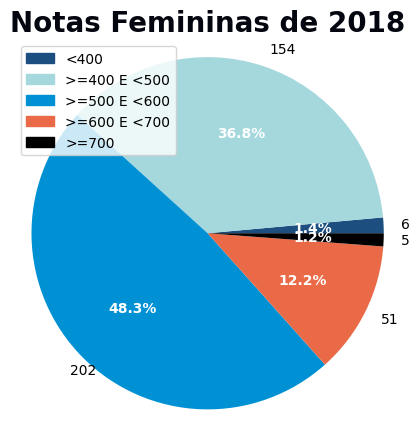

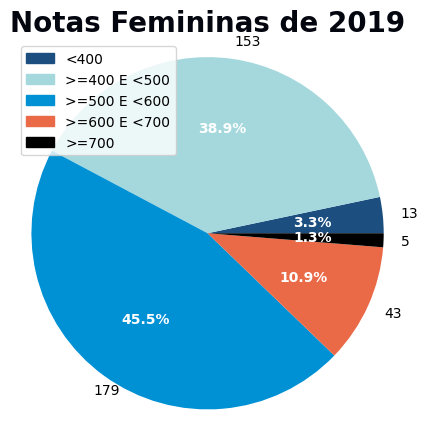

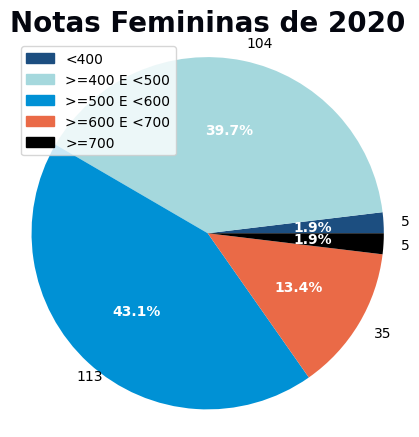

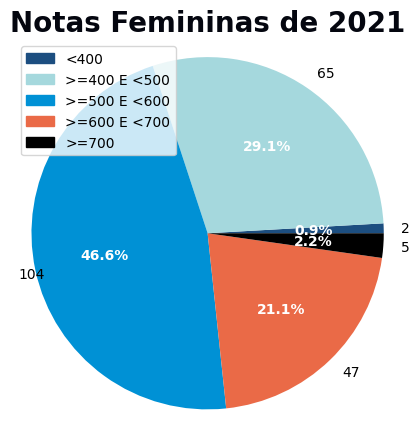

In [ ]:
#Notas segmentadas Femininas

for cx in data1:
  VLM= []
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] <400)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=400) & (Tabelax['Media_nota'] <500)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=500) & (Tabelax['Media_nota'] <600)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=600) & (Tabelax['Media_nota'] <700)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=700) & (Tabelax['Media_nota'] <800)]['Media_nota'].size)
  
  fig, ax = plt.subplots(figsize=(5,15))
  #=======================================================
  ax.set_title(f'Notas Femininas de {cx}', fontsize=20,fontweight='bold', color='#04060F')
  #=======================================================
  patches, texts, pcts = ax.pie(VLM,colors=colors, radius=3, center=(4, 4), wedgeprops={"linewidth": 0, "edgecolor": "white"}, frame=True, autopct='%.1f%%',labels=VLM)
  plt.setp(pcts, color='white', fontweight='bold')
  #==========================================================
  L400 = mpatches.Patch(color='#1C4E80', label='<400')
  L500 = mpatches.Patch(color='#A5D8DD', label='>=400 E <500')
  L600 = mpatches.Patch(color='#0091D5', label='>=500 E <600')
  L700 = mpatches.Patch(color='#EA6A47', label='>=600 E <700')
  L800 = mpatches.Patch(color='black', label='>=700')
  #============================================================
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  plt.axis('off')
  plt.legend(handles=[L400,L500,L600,L700,L800],loc='upper left')
  for c in VLM:
    ax.annotate(f'{VLM}', xy=(0.5, 0), xytext=(0, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))


In [ ]:
#Comparação entre genero Masculino e Feminino

for cx in data1:
  VLM= []
  VLF = []
  VLF.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] <400)]['Media_nota'].size)
  VLF.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=400) & (Tabelax['Media_nota'] <500)]['Media_nota'].size)
  VLF.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=500) & (Tabelax['Media_nota'] <600)]['Media_nota'].size)
  VLF.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=600) & (Tabelax['Media_nota'] <700)]['Media_nota'].size)
  VLF.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=700) & (Tabelax['Media_nota'] <800)]['Media_nota'].size)

  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] <400)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=400) & (Tabelax['Media_nota'] <500)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=500) & (Tabelax['Media_nota'] <600)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=600) & (Tabelax['Media_nota'] <700)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['Media_nota'] >=700) & (Tabelax['Media_nota'] <800)]['Media_nota'].size)
  

  #=======================================================
  for c in range(5):
    VLC = []
    VLC.append(VLM[c])
    VLC.append(VLF[c])

    fig, ax = plt.subplots(figsize=(5,15))
    
    ax.set_title(f'Comparação Homens vs Mulheres {cx}', fontsize=20,fontweight='bold', color='#04060F')
    patches, texts, pcts = ax.pie(VLC,colors=Color, radius=3, center=(4, 4), wedgeprops={"linewidth": 3, "edgecolor": "white"}, frame=True, autopct='%.1f%%', labels=VLC)
    plt.setp(pcts, color='white', fontweight='bold')
    LX= mpatches.Patch(color=colors[c], label=legendas[c])
    plt.legend(handles=[LX],loc='upper left')
    if VLC[0] > VLC[1]:
      contM+=1
    else:
      contF+=1
    #=======================================================
    
  #==========================================================

  #============================================================
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.axis('off')

print(f'homens{contM} vs Mulheres {contF}')

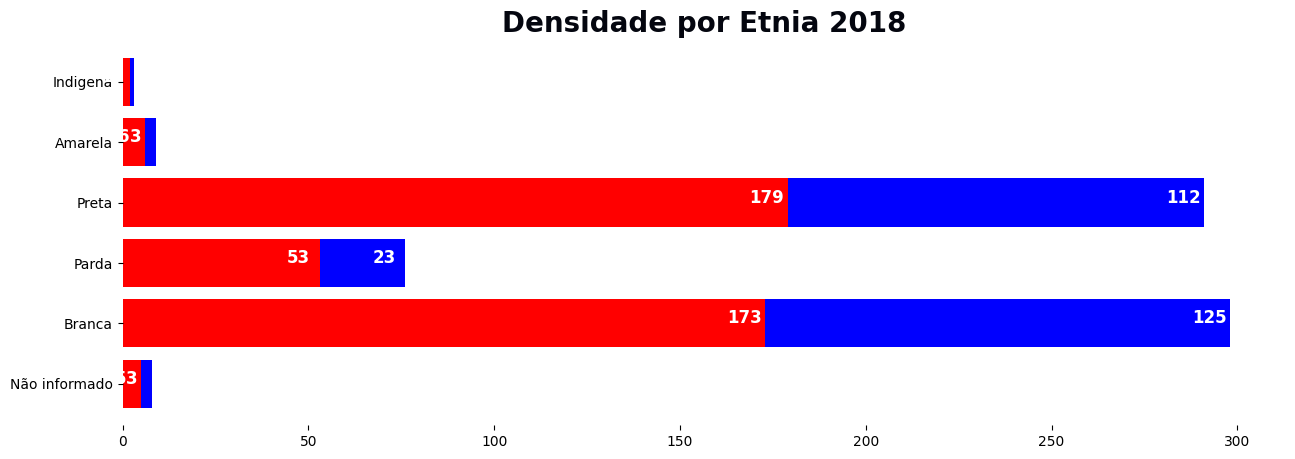

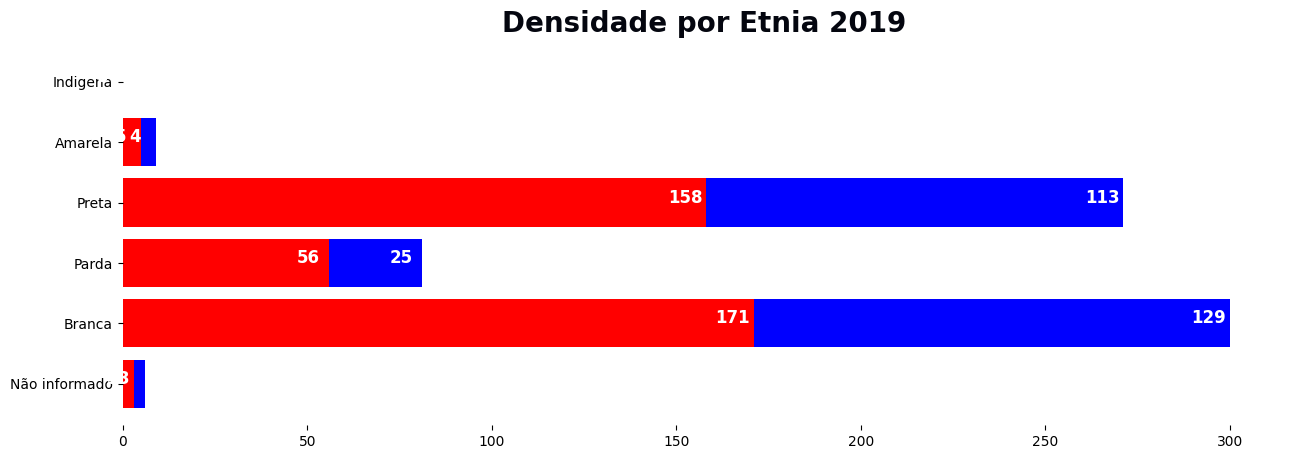

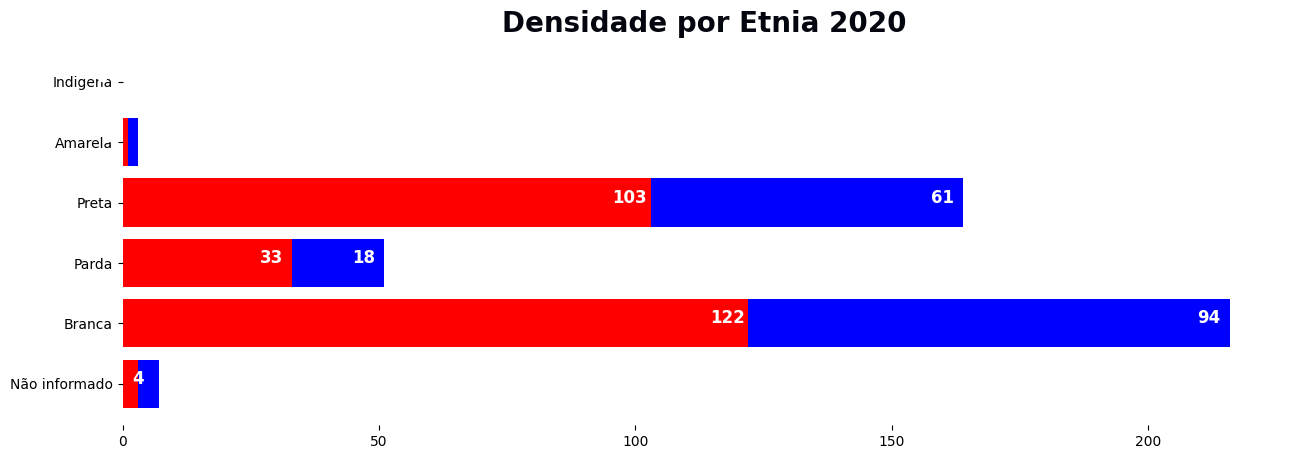

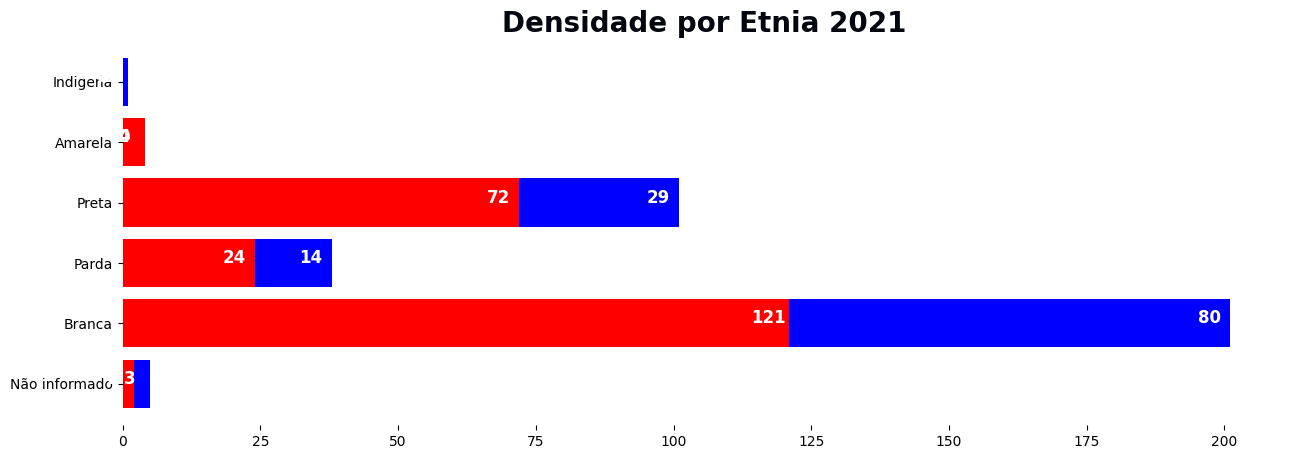

In [ ]:
#Densidade por Etnia do periodo

ct=0
for cx in data1:
  VLF = []
  VLM = []
  VLF.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['TP_COR_RACA'] ==0)]['Media_nota'].size)
  VLF.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['TP_COR_RACA'] ==1)]['Media_nota'].size)
  VLF.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['TP_COR_RACA'] ==2)]['Media_nota'].size)
  VLF.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['TP_COR_RACA'] ==3)]['Media_nota'].size)
  VLF.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['TP_COR_RACA'] ==4)]['Media_nota'].size)
  VLF.append(Tabelax[(Tabelax['TP_SEXO'] == 'F') & (Tabelax['NU_ANO'] == cx) & (Tabelax['TP_COR_RACA'] ==5)]['Media_nota'].size)

  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['TP_COR_RACA'] ==0)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['TP_COR_RACA'] ==1)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['TP_COR_RACA'] ==2)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['TP_COR_RACA'] ==3)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['TP_COR_RACA'] ==4)]['Media_nota'].size)
  VLM.append(Tabelax[(Tabelax['TP_SEXO'] == 'M') & (Tabelax['NU_ANO'] == cx) & (Tabelax['TP_COR_RACA'] ==5)]['Media_nota'].size)
  
  fig, ax = plt.subplots(figsize=(15,5))
  ax.set_title(f'Densidade por Etnia {cx}', fontsize=20,fontweight='bold', color='#04060F')
  ax.barh(Etnia,VLF, align='center',color='r')
  ax.barh(Etnia,VLM, align='center', color='b',left=VLF)
  for c in range(6):
    ax.annotate(f'{VLF[c]}',(VLF[c],Etnia[c]),
                fontsize=12, ha='center', xytext=(-15,0),textcoords= "offset points", color='w', fontweight='bold')
    
    ax.annotate(f'{VLM[c]}',(VLM[c]+VLF[c],Etnia[c]),
                fontsize=12, ha='center', xytext=(-15,0),textcoords= "offset points", color='w', fontweight='bold')
  
  
  ct+=1
  #==========================================================
  #============================================================
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['bottom'].set_visible(False)

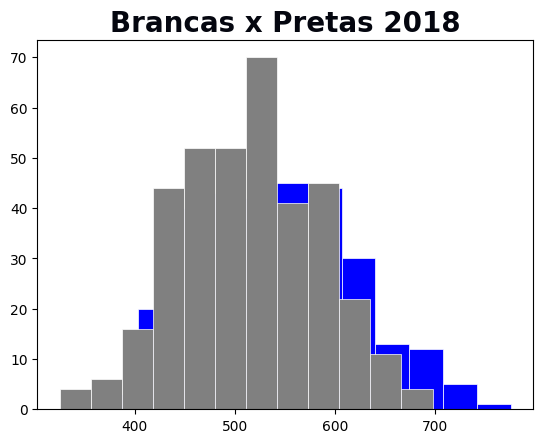

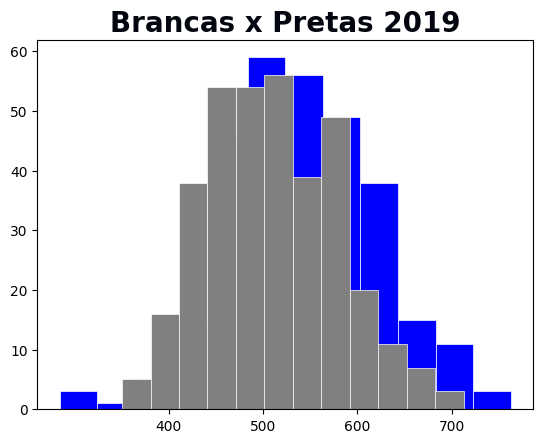

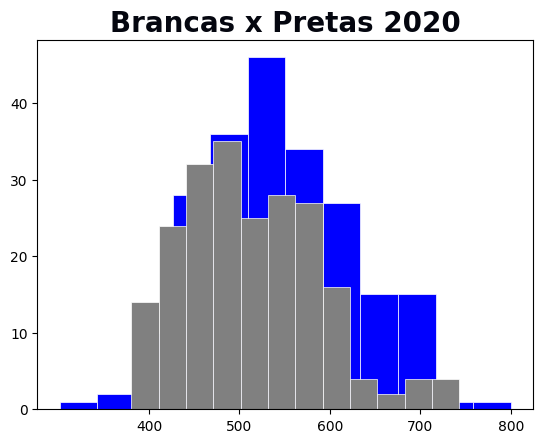

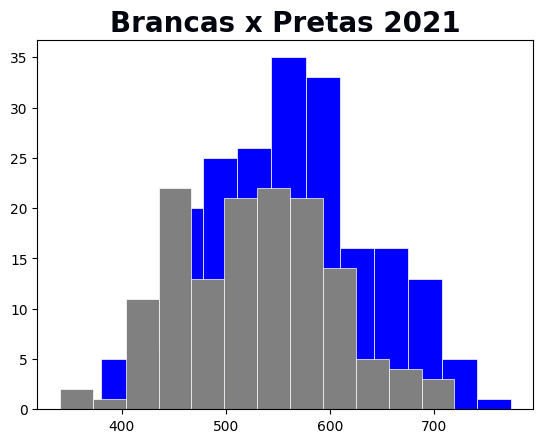

In [ ]:
#Divisão das notas por etnia
for c in data1:
  fig, ax = plt.subplots()
  ax.xaxis.set_ticks([400,500,600,700,800])
  ax.set_title(f'Brancas x Pretas {c}', fontsize=20, fontweight='bold', color='#04060F')
  ax.hist(Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['TP_COR_RACA'] ==1)]['Media_nota'], bins=12, linewidth=0.5, edgecolor="white",color='b')
  ax.hist(Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['TP_COR_RACA'] >1) & (Tabelax['TP_COR_RACA'] <4)]['Media_nota'], bins=12, linewidth=0.5, edgecolor="white",color='grey')

In [ ]:
cont= 0
for c in 'ABCDEFGHIJKLMNOPQ':
  cont+= 1
  Tabelax[['Q006']] = Tabelax[['Q006']].replace(c,cont)

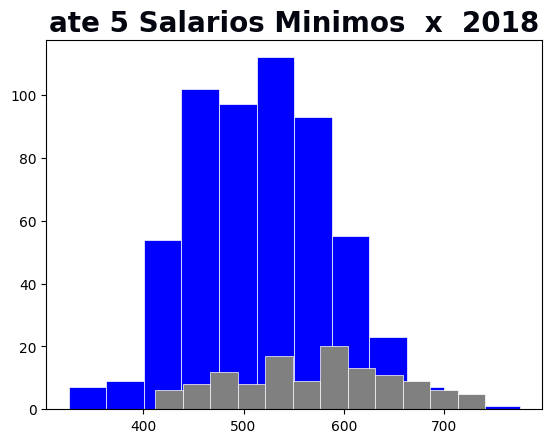

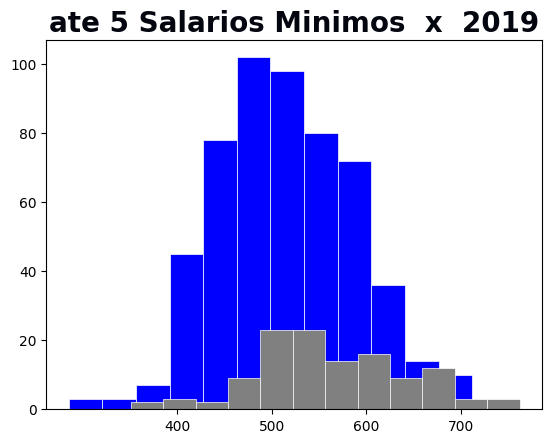

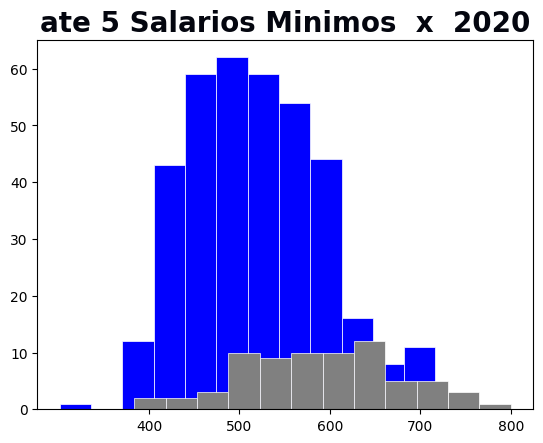

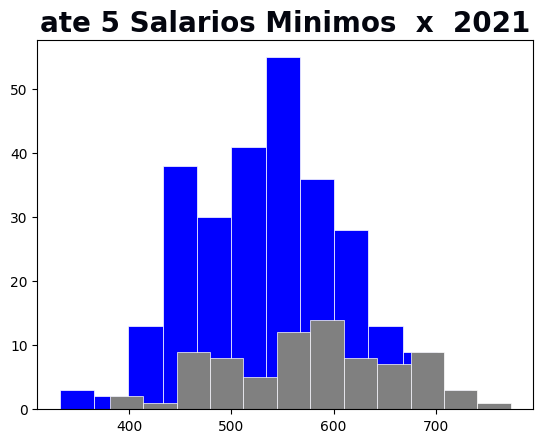

In [ ]:
#Divisão das notas por Renda Declarada
for c in data1:
  fig, ax = plt.subplots()
  ax.xaxis.set_ticks([400,500,600,700,800])
  ax.set_title(f'ate 5 Salarios Minimos  x  {c}', fontsize=20, fontweight='bold', color='#04060F')
  ax.hist(Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Q006'] <8)]['Media_nota'], bins=12, linewidth=0.5, edgecolor="white",color='b')
  ax.hist(Tabelax[(Tabelax['NU_ANO'] == c) & (Tabelax['Q006'] >=8)]['Media_nota'], bins=12, linewidth=0.5, edgecolor="white",color='grey')

In [ ]:
Tabelax0 = Tabelax.drop(['Unnamed: 0','NU_INSCRICAO','CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC'
,'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC','CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA','SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC','TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC','CO_PROVA_MT'
,'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC','TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH','TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO','NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4','NU_NOTA_COMP5', 'NU_NOTA_REDACAO'],axis=1)

In [ ]:
Tabelax0.columns

Index(['NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU',
       'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO', 'Q001', 'Q002', 'Q003',
       'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012',
       'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021',
       'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027', 'Media_nota'],
      dtype='object')

In [ ]:
# Perfil do Candidato acima de 700 pontos

px=[]
for c in Tabelax0.columns:
  print(Tabelax0[Tabelax0['Media_nota'] >=700][c].value_counts())
  px.append(Tabelax0[Tabelax0['Media_nota'] >=700][c].value_counts().index[0])
  print('--------------------------')
print(px)

2020    13
2018     8
2021     8
2019     7
Name: NU_ANO, dtype: int64
--------------------------
2     13
3      9
4      3
1      3
9      2
10     2
11     2
16     1
6      1
Name: TP_FAIXA_ETARIA, dtype: int64
--------------------------
F    20
M    16
Name: TP_SEXO, dtype: int64
--------------------------
1.0    27
0.0     8
2.0     1
Name: TP_ESTADO_CIVIL, dtype: int64
--------------------------
1    30
3     5
2     1
Name: TP_COR_RACA, dtype: int64
--------------------------
1    36
Name: TP_NACIONALIDADE, dtype: int64
--------------------------
1    18
2    14
3     4
Name: TP_ST_CONCLUSAO, dtype: int64
--------------------------
0     18
1      8
2      2
8      2
9      2
7      1
6      1
15     1
4      1
Name: TP_ANO_CONCLUIU, dtype: int64
--------------------------
1    22
3     6
4     5
2     3
Name: TP_ESCOLA, dtype: int64
--------------------------
1.0    14
Name: TP_ENSINO, dtype: int64
--------------------------
0    32
1     4
Name: IN_TREINEIRO, dtype: int64
---

In [ ]:
#Questionario Social

#Perfil Imaginario
#Idade entre 17 a 18
#MULHER ou HOMEm
#Branca
#==============
#Q001: Pai completou O Ensino Medio
#Q002: Mãe completou o Ensino Medio
#Q003: Ocupação Pai se encaixa no Grupo 4
#Q004: Ocupação mãe se encaixa no Grupo 4
#Q005: 4 Pessoas Moram na residencia
#Q006: Renda Mensal declarada entre 5.500R$ A 6.600R$
#Q007: não Possui Empregado Domestico
#Q008: Dois Banheiros Na residencia
#Q009: Possui 3 Quartos Na Residencia
#Q010: Possui um Carro
#Q011: Não Possui Moto
#Q012: Possui uma Geladeira
#Q013: 1 Freezer independente ou segunda porta da geladeira
#Q014: Possui Maquina de Lavar Roupas
#Q015: Não Possui Maquina de seca roupa
#Q016: Possui 1 Micro-ondas
#Q017: Não Possui Maquina de Lavar louças
#Q018: Não Possui aspirador de Pó
#Q019: Possui de uma a duas televisões 
#Q020: Possui Aparelho de DVD
#Q021: Não Possui Televisão por assinatura
#Q022: Possui 3 Telefones celulares
#Q023: Não Possui Telefone Fixo
#Q024: Possui 1 Computador 
#Q025: Possui Acesso A internet
